In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#한글패치
import platform
from matplotlib import font_manager , rc

if platform.system() == 'Darwin':
  rc('font' , family = 'AppleGothic')
elif platform.system() == 'Windows':
  path = 'C:/Windows/Fonts/malgun.ttf'
  font_name = font_manager.FontProperties(fname = path).get_name()
  rc('font' , family = font_name)
else:
  print('모름')
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('citrus.csv')

In [3]:
orange_diameter = list(data.iloc[:5000,1])
orange_weight = list(data.iloc[:5000,2])
Grape_diameter = list(data.iloc[5000:,1])
Grape_weight = list(data.iloc[5000:,2])

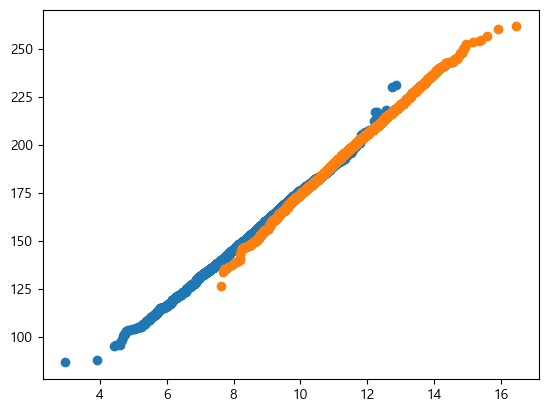

In [4]:
plt.scatter(orange_diameter , orange_weight)
plt.scatter(Grape_diameter , Grape_weight)
plt.show()

In [5]:
orange = np.column_stack([orange_diameter , orange_weight])
grape = np.column_stack([Grape_diameter , Grape_weight])
total = np.vstack([orange , grape])
target = np.concatenate([np.ones(5000) , np.zeros(5000)])


In [6]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(total , target)

KNeighborsClassifier()

In [7]:
kn.score(total , target)

0.9832

In [55]:
kn.predict([[9 , 200]]) # 지름 9 , 무게 200인 것은 자몽으로 예측함.

array([0.])

In [9]:
np.random.seed(120)
index = np.arange(10000)
np.random.shuffle(index)

In [10]:
input_array = np.array(total)
target_array = np.array(target)

In [11]:
train_input = input_array[index[:7000]]
train_target = target_array[index[:7000]]
test_input = input_array[index[7000:]]
test_target = target_array[index[7000:]]

In [12]:
k2 = KNeighborsClassifier()
k2.fit(train_input , train_target)
k2.score(test_input , test_target)

# train과 test를 7:3으로 나누어서 학습한 결과 

0.9613333333333334

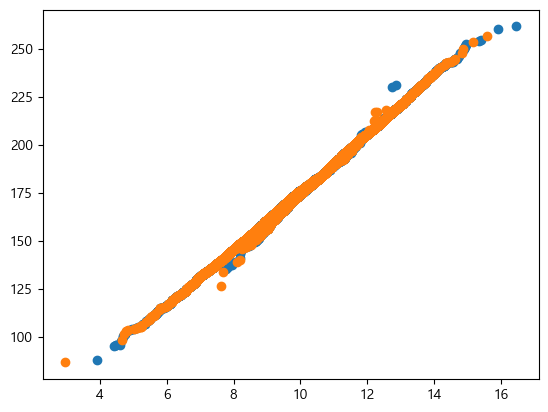

In [13]:
plt.scatter(train_input[: , 0] , train_input[: , 1])
plt.scatter(test_input[: , 0] , test_input[: , 1])
plt.show()

## Z벨류를 이용한 전처리 과정

In [14]:
mean = np.mean(train_input , axis = 0)
std = np.std(train_input , axis = 0)
train_scaled = (train_input - mean)/std

In [15]:
mean1 = np.mean(test_input , axis = 0)
std1 = np.std(test_input , axis = 0)
test_scaled = (test_input - mean1)/std1
test_scaled

array([[ 0.99221725,  1.00664423],
       [ 1.03861482,  1.04583133],
       [-0.66262951, -0.66533878],
       ...,
       [-1.4720094 , -1.44564335],
       [-1.24517682, -1.24317666],
       [ 2.48725015,  2.48956666]])

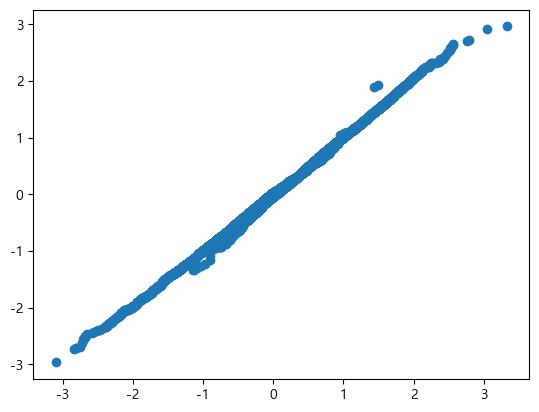

In [16]:
plt.scatter(train_scaled[: , 0] , train_scaled[: , 1])
plt.show()

In [17]:
k3 = KNeighborsClassifier()
k3.fit(train_scaled , train_target)
k3.score(test_scaled , test_target) # 위의 0.97... 과는 다르게 0.99로 점수가 더 높아진 것을 알 수 있다.

0.9923333333333333

In [18]:
total

array([[  2.96,  86.76],
       [  3.91,  88.05],
       [  4.42,  95.17],
       ...,
       [ 15.59, 256.5 ],
       [ 15.92, 260.14],
       [ 16.45, 261.51]])

In [56]:
fruit = ([11,190] - mean)/std

In [57]:
k3.predict([fruit])

array([0.])

- 지름 11 , 무게 190인 과일은 0(자몽)이라고 예측함.

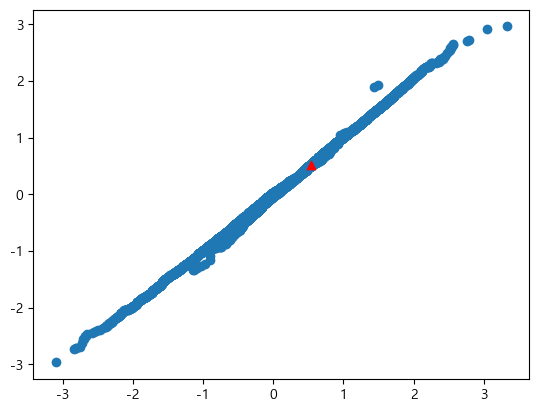

In [58]:
plt.scatter(train_scaled[: , 0] , train_scaled[: , 1])
plt.scatter(fruit[0] , fruit[1] , color = 'r' , marker = '^')
plt.show()

In [59]:
distances1 , indexes1 = k3.kneighbors([fruit])
print(distances1 , indexes1)

[[0.00341769 0.00375946 0.00375946 0.00410123 0.0051709 ]] [[3273 6382  222 2814 4016]]


In [60]:
train_target[indexes1]

array([[0., 0., 0., 0., 0.]])